# Template code for Bayesian analysis

This template provides regression tables, point plots, and reconstruction plots for empirical (James-Stein) and hierarchical Bayesian estimates.

Instructions:

1. Upload a file named `data.csv` to this folder with your conventional estimates. Open `data.csv` to see an example. In this file, we named our dependent variable "dep_variable", and have estimated the effects of policies named "policy0",..., "policy3". The first column of `data.csv` contains the conventional estimates `X` of the true unknown mean. The remaining columns contain consistent estimates of the corresponding covariance matrix $\Sigma$. In the example `data.csv` provided, $X=(0, 1, 2, 3)$ and $\Sigma = I$.
2. Modify the code if necessary.
3. Run the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import loguniform

from conditional_inference.bayes.classic import LinearClassicBayes
from conditional_inference.bayes.empirical import JamesStein, LinearEmpiricalBayes
from conditional_inference.bayes.hierarchical import LinearHierarchicalBayes

data_file = "data.csv"
alpha = .05
sns.set()

In [2]:
conventional_result = LinearClassicBayes.from_csv(data_file, prior_cov=np.inf)\
    .fit(cols="sorted")
conventional_result.summary(title="Conventional estimates", alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
      Conventional estimates      
==================================
         coef pvalue [0.025 0.975]
----------------------------------
policy3 3.000  0.001  1.040  4.960
policy2 2.000  0.023  0.040  3.960
policy1 1.000  0.159 -0.960  2.960
policy0 0.000  0.500 -1.960  1.960
==========================
Dep. Variable dep_variable
--------------------------
"""

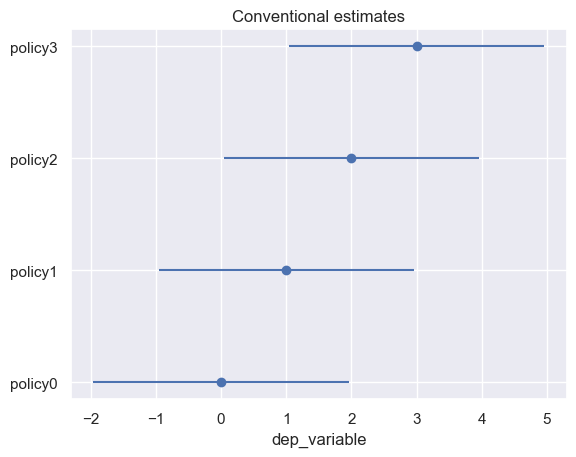

In [3]:
conventional_result.point_plot(title="Conventional estimates", alpha=alpha)
plt.show()

Reconstruction Wasserstein distance: 0.8757874850538522


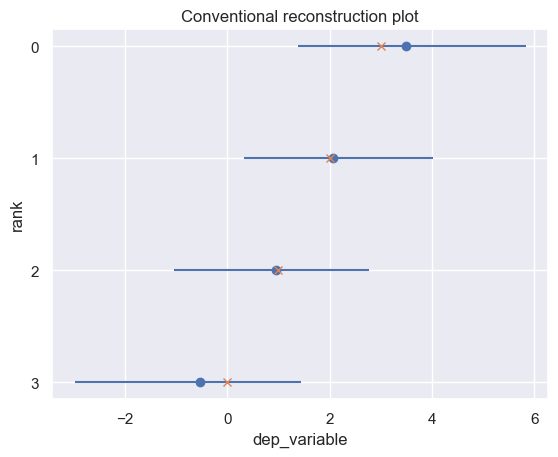

In [4]:
print(f"Reconstruction Wasserstein distance: {conventional_result.expected_wasserstein_distance()}")
conventional_result.reconstruction_point_plot(title="Conventional reconstruction plot")
plt.show()

In [5]:
js_result = JamesStein.from_csv(data_file).fit(cols="sorted")
js_result.summary(alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
    Empirical Bayes estimates     
==================================
         coef pvalue [0.025 0.975]
----------------------------------
policy3 2.940  0.002  0.994  4.886
policy2 1.980  0.022  0.049  3.911
policy1 1.020  0.150 -0.911  2.951
policy0 0.060  0.476 -1.886  2.006
==========================
Dep. Variable dep_variable
--------------------------
"""

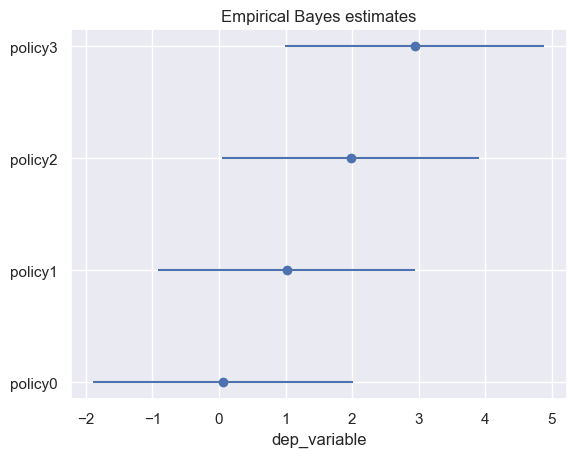

In [6]:
js_result.point_plot(alpha=alpha)
plt.show()

Reconstruction Wasserstein distance: 0.8475537834759598


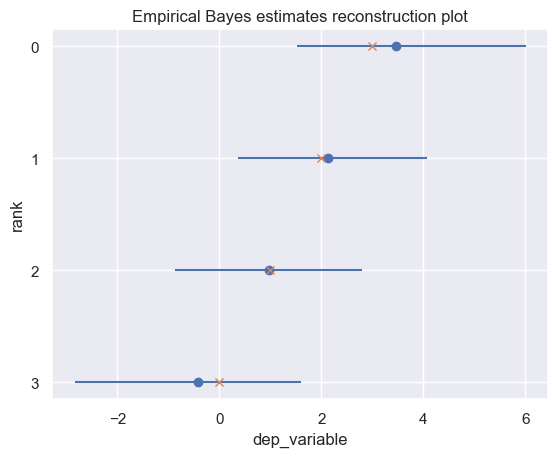

In [7]:
print(f"Reconstruction Wasserstein distance: {js_result.expected_wasserstein_distance()}")
js_result.reconstruction_point_plot()
plt.show()

In [8]:
# construct the hyperprior distribution
# i.e. the distribution of the prior standard deviation parameter
_, prior_std_anchor = LinearEmpiricalBayes.from_csv(data_file).estimate_prior_params()
prior_std_distribution = loguniform(.5 * prior_std_anchor, 2 * prior_std_anchor)

hb_result = LinearHierarchicalBayes.from_csv(
    data_file, prior_cov_params_distribution=prior_std_distribution
).fit(cols="sorted")
hb_result.summary(alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
   Hierarchical Bayes estimates   
==================================
         coef pvalue [0.025 0.975]
----------------------------------
policy3 1.867  0.002  0.564  3.296
policy2 1.619  0.007  0.329  2.957
policy1 1.394  0.021  0.068  2.613
policy0 1.153  0.058 -0.309  2.347
==========================
Dep. Variable dep_variable
--------------------------
"""

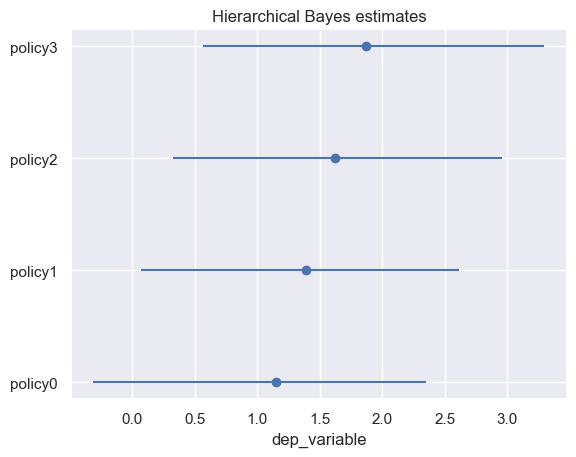

In [9]:
hb_result.point_plot(alpha=alpha)
plt.show()

Reconstruction Wasserstein distance: 0.7147216677308144


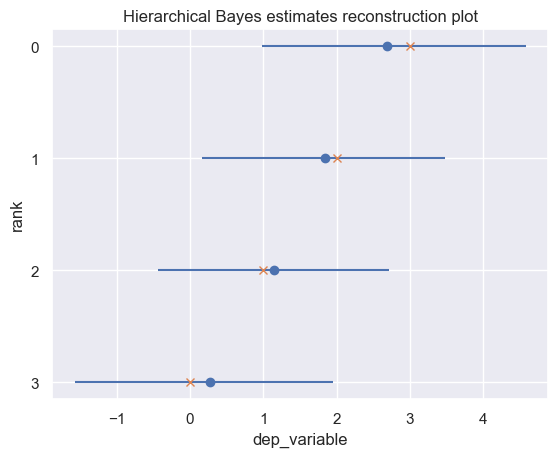

In [10]:
print(f"Reconstruction Wasserstein distance: {hb_result.expected_wasserstein_distance()}")
hb_result.reconstruction_point_plot()
plt.show()